# **Evidencia de aprendizaje 1: Creación de una base de datos análiticas**

##  **1. Problematica y dataset**

Este dataset fue organizado y construido para propositos educativos y no como una herramienta para la predicción de cancer de pulmón en pacientes. La idea es poder encontrar patrones y tendencias en los pacientes y evolución en los tratamientos aplicados que faciliten un diganostico temprano de esta problematica mediante modelos de machine learning y analisis exploratorio de datos.

Este es el link kagle para acceder a más información del data set: 
https://www.kaggle.com/datasets/khwaishsaxena/lung-cancer-dataset/data





### Variables relevantes encontrada en el dataset

*  id: Identificador único de cada paciente.
*  age: La edad de los pacientes en el momoento que fueron diganosticados.
*  gender: Genero de los pacientes. Ejemplo male y female.
*  country: País donde vive el paciente.
*  diagnosis_date: Fecha en la cual el paciente fue diganosticado con cancer de pulmón.
*  cancer_stage: Fase en la que se encuentra el cancer al momento del diagnostico. Ejemplo Stage I, Stage II,
Stage III, Stage IV.
* family_history: Indica si hay historrial de cancer en la familia. Ejemplo yes y no.
* smoking_status: Indica si el paciente es funmador.Ejemplo current smoker, former smoker,
never smoked, passive smoker.
*  bmi: Indice de masa corporal del paciente cuando fue diagnosticado.
*  cholesterol_level: Indica el valor del nivel del colesterol del paciente.
*  hypertension: Indica si el paciente tiene hipertensión alta. Ejemplo yes, no.
*  asthma: Indicata si el paciente tiene asma.Ejemplo yes, no.
*  cirrhosis: Indica si el paciente tiene cirrosis en el hígado.Ejemplo yes, no.
*  other_cancer: Indica si el paciente tiene otro tipo de cancer además del diganostico de pulmon Ejemplo yes, no.
*  treatment_type: El tipo de tratamiento que el paciente ha recivido. Ejemplo surgery, chemotherapy,
radiation, combined.
*  end_treatment_date: La fecha en el que el paciente ha terminado su tratamiento o ha muerto.
* survived: Indica si el paciente sobrevivio. Ejemplo yes, no.

In [3]:
#Libreria
import pandas as pd
import sqlite3

In [4]:
#Cargando dataset cancer de pulmon
df=pd.read_csv("/workspaces/Bigdata_2025-2/src/bigdata/static/csv/Lung Cancer.csv")
df.head(5)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [5]:
# Dividiendo dataframe en dos nuevos dataframes

pacientes = df[['id', 'age', 'gender', 'country', 'family_history', 'smoking_status', 'bmi']].drop_duplicates()
historial = df[['id', 'diagnosis_date', 'cancer_stage', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer',
                     'treatment_type', 'end_treatment_date', 'survived']].copy()
historial.rename(columns={'id': 'patient_id'}, inplace=True)



In [6]:
# nuevo dataframe paciente
pacientes.head(5)

,id,age,gender,country,family_history,smoking_status,bmi
0,1,64.0,Male,Sweden,Yes,Passive Smoker,29.4
1,2,50.0,Female,Netherlands,Yes,Passive Smoker,41.2
2,3,65.0,Female,Hungary,Yes,Former Smoker,44.0
3,4,51.0,Female,Belgium,No,Passive Smoker,43.0
4,5,37.0,Male,Luxembourg,No,Passive Smoker,19.7


In [7]:
#Nuevo dataframe historial
historial.head()

,patient_id,diagnosis_date,cancer_stage,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,2016-04-05,Stage I,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,2023-04-20,Stage III,280,1,1,0,0,Surgery,2024-06-17,1
2,3,2023-04-05,Stage III,268,1,1,0,0,Combined,2024-04-09,0
3,4,2016-02-05,Stage I,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,2023-11-29,Stage I,178,0,0,0,0,Combined,2025-01-08,0


In [8]:
#CReacion Cancer.db con sus respectivas tablas y carga de datos

# Conectar a SQLite
conn = sqlite3.connect("cancer_db.db")
cursor = conn.cursor()

# Creación de tablas
cursor.execute("""
CREATE TABLE IF NOT EXISTS pacientes (
    id INTEGER PRIMARY KEY,
    age INTEGER,
    gender TEXT,
    country TEXT,
    family_history TEXT,
    smoking_status TEXT,
    bmi REAL
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS historial (
    record_id INTEGER PRIMARY KEY AUTOINCREMENT,
    patient_id INTEGER,
    diagnosis_date TEXT,
    cancer_stage TEXT,
    cholesterol_level REAL,
    hypertension INTEGER,
    asthma INTEGER,
    cirrhosis INTEGER,
    other_cancer TEXT,
    treatment_type TEXT,
    end_treatment_date TEXT,
    survived INTEGER,
    FOREIGN KEY(patient_id) REFERENCES patients(id)
)
""")

# Insertar datos de los DataFrames
pacientes.to_sql("pacientes", conn, if_exists="append", index=False)
historial.to_sql("historial", conn, if_exists="append", index=False)

# Verificar tablas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

conn.commit()
conn.close()

IntegrityError: UNIQUE constraint failed: pacientes.id

In [ ]:
# Hacer consulta a la base da datos

# Conectar a la base de datos
conn = sqlite3.connect("cancer_db.db")

# query
query = """
SELECT p.id, p.age, c.diagnosis_date, c.cancer_stage
FROM pacientes p
JOIN historial c ON p.id = c.patient_id
"""

# Ejecutar el query y guardar el resultado en un DataFrame
df_consulta = pd.read_sql_query(query, conn)
# Cerrar la conexión
conn.close()


In [ ]:
df_consulta.head()

,id,age,diagnosis_date,cancer_stage
0,1,64,2016-04-05,Stage I
1,2,50,2023-04-20,Stage III
2,3,65,2023-04-05,Stage III
3,4,51,2016-02-05,Stage I
4,5,37,2023-11-29,Stage I


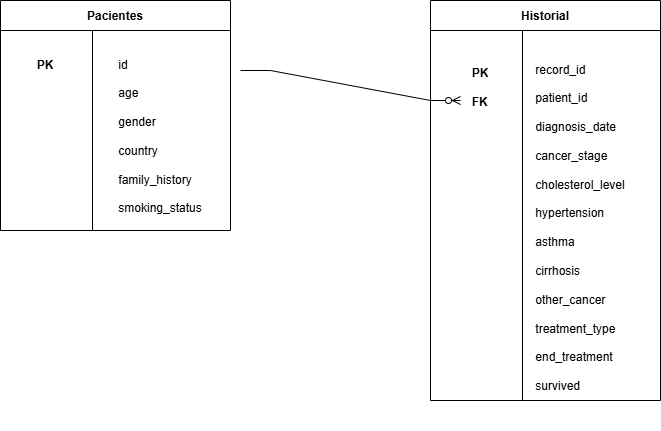

In [ ]:

from IPython.display import Image

# Use the path to the new PNG file you just created
image_path = "/workspaces/Bigdata_2025-2/docs/modelo_entidad_relacion.png"


# This will display the diagram directly in the cell's output
Image(filename=image_path)